Assignment 1: Nearest Neighbours & KMeans



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting Price of House using KNearestNeighbour Regressor



In [2]:
"""Use pandas to get some insights into the data """


'Use pandas to get some insights into the data '

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [4]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [5]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


In [11]:
a=df.corr()

In [12]:
a

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.118568,0.304795,0.613589,0.458412,0.725545,0.823781
Floor,0.118568,1.000000,0.552552,0.039165,-0.025554,0.088359,0.226952
TotalFloor,0.304795,0.552552,1.000000,0.079984,0.023659,0.141258,0.336982
Bedroom,0.613589,0.039165,0.079984,1.000000,0.527463,0.650881,0.465091
Living.Room,0.458412,-0.025554,0.023659,0.527463,1.000000,0.559363,0.332643
Bathroom,0.725545,0.088359,0.141258,0.650881,0.559363,1.000000,0.604204
Price,0.823781,0.226952,0.336982,0.465091,0.332643,0.604204,1.000000


In [13]:
a[a['Price']>0.4]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.118568,0.304795,0.613589,0.458412,0.725545,0.823781
Bedroom,0.613589,0.039165,0.079984,1.000000,0.527463,0.650881,0.465091
Bathroom,0.725545,0.088359,0.141258,0.650881,0.559363,1.000000,0.604204
Price,0.823781,0.226952,0.336982,0.465091,0.332643,0.604204,1.000000


In [14]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000
mean,1516.918580,5.908463,10.778929,2.825561,1.803109,1.80829,61383.614853
std,776.655587,3.893511,5.027210,1.018328,0.477077,0.68816,35764.023105
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.00000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.00000,38000.000000
50%,1419.642000,5.000000,11.000000,3.000000,2.000000,2.00000,50000.000000
75%,1891.077000,8.000000,14.000000,4.000000,2.000000,2.00000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.00000,250000.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         579 non-null    float64
 1   Floor        579 non-null    int64  
 2   TotalFloor   579 non-null    int64  
 3   Bedroom      579 non-null    int64  
 4   Living.Room  579 non-null    int64  
 5   Bathroom     579 non-null    int64  
 6   Price        579 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [16]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [17]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
"""Show some interesting visualization of the data"""

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


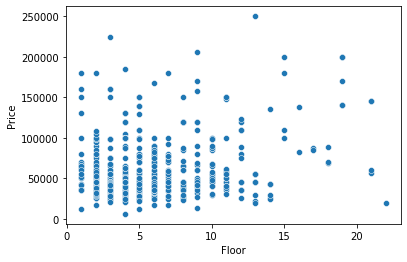

In [18]:
sns.scatterplot(df['Floor'],df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


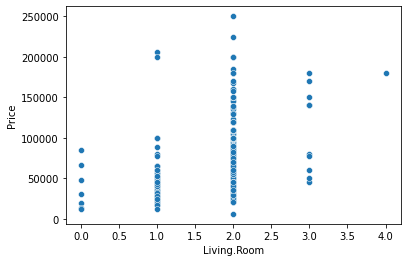

In [19]:
sns.scatterplot(df['Living.Room'],df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


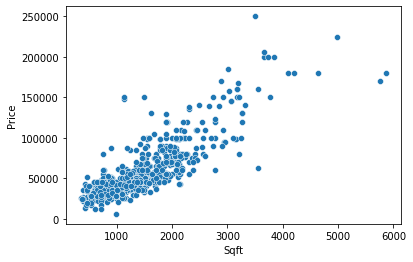

In [20]:
sns.scatterplot(df['Sqft'],df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


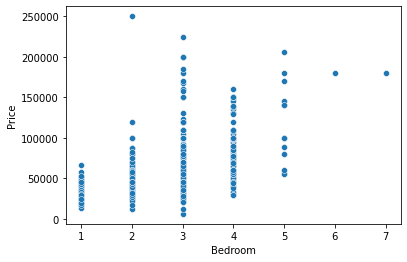

In [21]:
sns.scatterplot(df['Bedroom'],df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


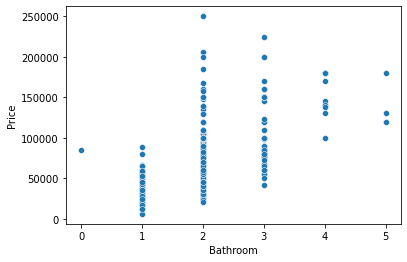

In [22]:
sns.scatterplot(df['Bathroom'],df['Price'])

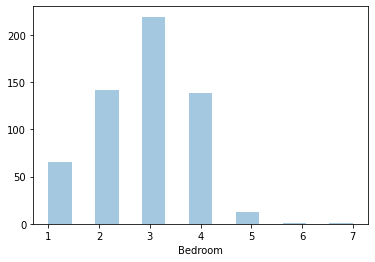

In [24]:
sns.distplot(df['Bedroom'],kde=False)

In [ ]:
""" Manage data for training & testing"""

In [25]:
x=df[['Sqft','Bedroom','Bathroom']]


In [26]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [32]:
mms=MinMaxScaler()

In [31]:
x_fit=mms.fit_transform(x)

In [29]:
y=df.Price

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x_fit,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
score={}

In [36]:
for i in range(3,10,2):
  knr=KNeighborsRegressor(n_neighbors=i)
  knr.fit(xtrain,ytrain)
  score[i]=knr.score(xtest,ytest)
score

{3: 0.5058156366116723,
 5: 0.5692538893066362,
 7: 0.561944758828971,
 9: 0.5680790822932797}

In [37]:
keymax=max(score,key=lambda x:score[x])

In [38]:
k=keymax

In [39]:
knr=KNeighborsRegressor(n_neighbors=k)
knr.fit(xtrain,ytrain)
knr.score(xtest,ytest)


0.5692538893066362

In [40]:
knr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
k

5

Cluster similar Houses

In [42]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [43]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [44]:
df.drop(['Floor','TotalFloor'],axis=1,inplace=True)

In [45]:
for i in df.columns:
  print(set(list(df[i])),'\n')


{2561.76, 1540.614, 2052.966, 1031.82, 1544.172, 523.026, 526.584, 2063.64, 1551.288, 2067.198, 533.7, 1558.404, 3095.46, 537.258, 540.816, 1565.52, 2590.224, 1569.078, 2081.43, 4643.19, 1572.636, 1063.842, 2088.546, 1576.194, 1067.4, 1579.752, 1586.868, 2099.22, 1074.516, 2102.778, 569.28, 572.838, 1085.19, 1601.1, 583.512, 2120.568, 3145.272, 587.07, 3148.83, 1099.422, 590.628, 1102.98, 3664.74, 1106.538, 2134.8, 1622.448, 601.302, 2138.358, 604.86, 2141.916, 2145.474, 1124.328, 3173.736, 2149.032, 1127.886, 1636.68, 4198.44, 2156.148, 2668.5, 1135.002, 1647.354, 1138.56, 3187.968, 2170.38, 1661.586, 2173.938, 1149.234, 1152.792, 640.44, 3202.2, 1665.144, 1668.702, 5760.402, 1672.26, 2184.612, 1163.466, 2700.522, 651.114, 2191.728, 1167.024, 658.23, 1174.14, 3735.9, 1177.698, 1690.05, 665.346, 668.904, 2205.96, 1181.256, 1184.814, 1697.166, 1700.724, 1188.372, 2213.076, 1191.93, 1704.282, 3241.338, 676.02, 1707.84, 1195.488, 683.136, 2739.66, 2227.308, 693.81, 1206.162, 3255.57, 1209

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


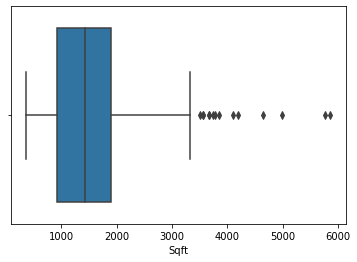

In [46]:
sns.boxplot(df['Sqft'])

In [47]:
df[df['Sqft']>5000]

,Sqft,Bedroom,Living.Room,Bathroom,Price
572,5856.468,6,2,5,180000
578,5760.402,3,2,3,170000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


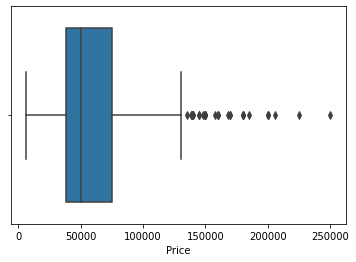

In [48]:
sns.boxplot(df['Price'])

In [49]:
df[df['Price']>200000]

,Sqft,Bedroom,Living.Room,Bathroom,Price
147,4981.20,3,2,3,225000
286,3504.63,2,2,2,250000
299,3664.74,5,1,2,206000


In [50]:
from sklearn.cluster import KMeans

In [51]:
error=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

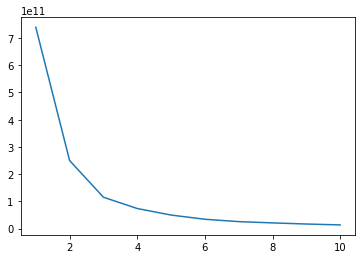

In [52]:
plt.plot([i for i in range(1,11)],error)

In [53]:
k=3

In [54]:
kmeans=KMeans(n_clusters=k)
kmeans.fit(df)


KMeans(n_clusters=3)

In [55]:
df['cluster']=kmeans.predict(df)

In [56]:
df.head()

,Sqft,Bedroom,Living.Room,Bathroom,Price,cluster
0,1177.698,2,2,2,62000,1
1,2134.800,4,2,2,78000,0
2,1138.560,2,2,1,58000,1
3,1458.780,3,2,2,45000,1
4,967.776,3,2,2,45000,1
